# 3. Sentiment Analysis
Analyzing sentiment of comments

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
from openai import OpenAI
import time
from transformers import pipeline
from tqdm import tqdm
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

c:\Users\kimdo\anaconda3\envs\yt_nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.8.0+cpu
False


AssertionError: Torch not compiled with CUDA enabled

In [8]:
df = pd.read_csv('../data/classified_comments.csv')
df.head()

,input,comment,replyCount,label
0,Samsung Galaxy Z Fold 7,Sponsored by dbrand. Skin your Galaxy Fold7 (o...,3,others
1,Samsung Galaxy Z Fold 7,Finally a review of the zfold 7 from an actual...,30,others
2,Samsung Galaxy Z Fold 7,omg the script next to the selfie video... tha...,10,others
3,Samsung Galaxy Z Fold 7,I've said this before and I'll say it again. M...,0,others
4,Samsung Galaxy Z Fold 7,my man starts the video with a shot at a beaut...,0,others


In [9]:
print(df.info())
print("============================================")
print(df.input.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   input       1457 non-null   object
 1   comment     1457 non-null   object
 2   replyCount  1457 non-null   int64 
 3   label       1457 non-null   object
dtypes: int64(1), object(3)
memory usage: 45.7+ KB
None
input
Samsung Galaxy Z Fold 7    861
Iphone 17                  596
Name: count, dtype: int64


In [11]:

tqdm.pandas()

sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

comments = df["comment"].astype(str).tolist()

results = sentiment_analyzer(
    comments,
    truncation=True,
    batch_size=16
)

df["sentiment_label"] = [r["label"] for r in results]
df["sentiment_score"] = [r["score"] for r in results]

df.to_csv("../data/youtube_sentiment_results.csv", index=False)

print("✅ Sentiment analysis completed and saved as 'youtube_sentiment_results.csv'")
print(df.head())


Device set to use cuda:0


✅ Sentiment analysis completed and saved as 'youtube_sentiment_results.csv'
                     input                                            comment  \
0  Samsung Galaxy Z Fold 7  Sponsored by dbrand. Skin your Galaxy Fold7 (o...   
1  Samsung Galaxy Z Fold 7  Finally a review of the zfold 7 from an actual...   
2  Samsung Galaxy Z Fold 7  omg the script next to the selfie video... tha...   
3  Samsung Galaxy Z Fold 7  I've said this before and I'll say it again. M...   
4  Samsung Galaxy Z Fold 7  my man starts the video with a shot at a beaut...   

   replyCount   label sentiment_label  sentiment_score  
0           3  others        NEGATIVE         0.991983  
1          30  others        POSITIVE         0.999137  
2          10  others        POSITIVE         0.997060  
3           0  others        POSITIVE         0.999217  
4           0  others        POSITIVE         0.999874  


## Data Inspection

In [ ]:

df = pd.read_csv('../data/youtube_sentiment_results.csv')

df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   input            1457 non-null   object 
 1   comment          1457 non-null   object 
 2   replyCount       1457 non-null   int64  
 3   label            1457 non-null   object 
 4   sentiment_label  1457 non-null   object 
 5   sentiment_score  1457 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 68.4+ KB


(None,
                      input                                            comment  \
 0  Samsung Galaxy Z Fold 7  Sponsored by dbrand. Skin your Galaxy Fold7 (o...   
 1  Samsung Galaxy Z Fold 7  Finally a review of the zfold 7 from an actual...   
 2  Samsung Galaxy Z Fold 7  omg the script next to the selfie video... tha...   
 3  Samsung Galaxy Z Fold 7  I've said this before and I'll say it again. M...   
 4  Samsung Galaxy Z Fold 7  my man starts the video with a shot at a beaut...   
 
    replyCount   label sentiment_label  sentiment_score  
 0           3  others        NEGATIVE         0.991983  
 1          30  others        POSITIVE         0.999137  
 2          10  others        POSITIVE         0.997060  
 3           0  others        POSITIVE         0.999217  
 4           0  others        POSITIVE         0.999874  )

In [23]:
# Step 3: Filter out rows labeled as "others"
df = df[df["label"].str.lower() != "others"].copy()

# Show remaining count and unique labels
remaining_count = len(df)
unique_labels = df["label"].unique().tolist()

remaining_count, unique_labels, df.head()

(530,
 ['design', 'price', 'camera', 'battery', 'performance'],
                       input  \
 5   Samsung Galaxy Z Fold 7   
 9   Samsung Galaxy Z Fold 7   
 10  Samsung Galaxy Z Fold 7   
 12  Samsung Galaxy Z Fold 7   
 16  Samsung Galaxy Z Fold 7   
 
                                               comment  replyCount   label  \
 5   Thank for standing up for the removal of the u...          26  design   
 9   I was legit blown away when i held this in han...           2  design   
 10  6:00\nTHANK YOU for being the voice of the min...           8  design   
 12  Had one since Thursday and the engineering is ...           6  design   
 16  The 1TB version of this phone is over $4000 he...          12   price   
 
    sentiment_label  sentiment_score  
 5         NEGATIVE         0.998653  
 9         NEGATIVE         0.996963  
 10        NEGATIVE         0.994673  
 12        NEGATIVE         0.999694  
 16        NEGATIVE         0.987575  )

📊 Sentiment Summary by Input:


sentiment_label,NEGATIVE,POSITIVE,Total,Positive %,Negative %
input,,,,,
Samsung Galaxy Z Fold 7,212,118,330,35.76,64.24
Iphone 17,135,65,200,32.50,67.50


<Figure size 1000x600 with 0 Axes>

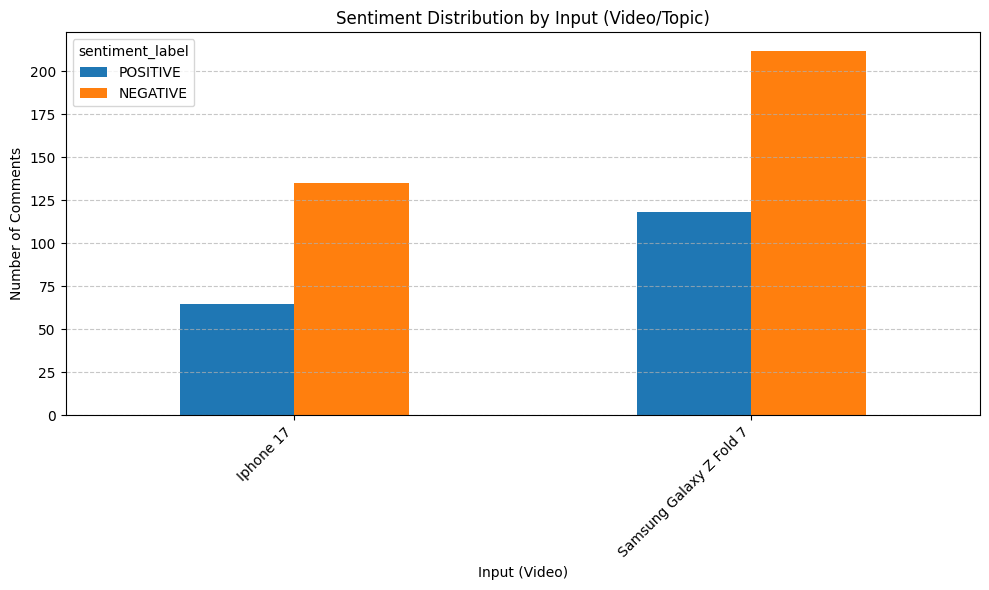

In [ ]:

sentiment_by_input = (
    df.groupby(["input", "sentiment_label"])
      .size()
      .unstack(fill_value=0)
)


sentiment_by_input["Total"] = sentiment_by_input.sum(axis=1)
sentiment_by_input["Positive %"] = (sentiment_by_input.get("POSITIVE", 0) / sentiment_by_input["Total"]) * 100
sentiment_by_input["Negative %"] = (sentiment_by_input.get("NEGATIVE", 0) / sentiment_by_input["Total"]) * 100

print("Sentiment Summary by Input:")
display(sentiment_by_input.sort_values("Positive %", ascending=False).round(2))

plt.figure(figsize=(10, 6))
sentiment_by_input[["POSITIVE", "NEGATIVE"]].plot(
    kind="bar",
    stacked=False,
    figsize=(10, 6)
)
plt.title("Sentiment Distribution by Input (Video/Topic)")
plt.xlabel("Input (Video)")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:

aspect_by_input = (
    df.groupby(["input", "label", "sentiment_label"])
    .size()
    .unstack(fill_value=0)
)

aspect_by_input["Total"] = aspect_by_input.sum(axis=1)
aspect_by_input["Positive %"] = (aspect_by_input.get("POSITIVE", 0) / aspect_by_input["Total"]) * 100
aspect_by_input["Negative %"] = (aspect_by_input.get("NEGATIVE", 0) / aspect_by_input["Total"]) * 100


avg_scores = (
    df.groupby(["input", "label"])["sentiment_score"]
    .mean()
    .rename("Avg Sentiment Score")
)

aspect_by_input = aspect_by_input.merge(avg_scores, on=["input", "label"])

aspect_by_input = aspect_by_input.sort_values(["input", "Positive %"], ascending=[True, False])

# Display summary table
print("Sentiment by Input and Aspect:")
display(aspect_by_input.round(2))


📊 Sentiment by Input and Aspect:


NEGATIVE  POSITIVE  Total  Positive %  \
input                   label                                                
Iphone 17               camera             32        19     51       37.25   
                        battery            22        11     33       33.33   
                        price              23        11     34       32.35   
                        design             36        15     51       29.41   
                        performance        22         9     31       29.03   
Samsung Galaxy Z Fold 7 performance        16        15     31       48.39   
                        design             64        47    111       42.34   
                        price              22        10     32       31.25   
                        camera             50        22     72       30.56   
                        battery            60        24     84       28.57   

                                     Negative %  Avg Sentiment Score  
input                   label                                         
Iphone 17               camera            62.75                 0.94  
                        battery           66.67                 0.94  
                        price             67.65                 0.96  
                        design            70.59                 0.95  
                        performance       70.97                 0.94  
Samsung Galaxy Z Fold 7 performance       51.61                 0.94  
                        design            57.66                 0.96  
                        price             68.75                 0.97  
                        camera            69.44                 0.98  
                        battery           71.43                 0.95

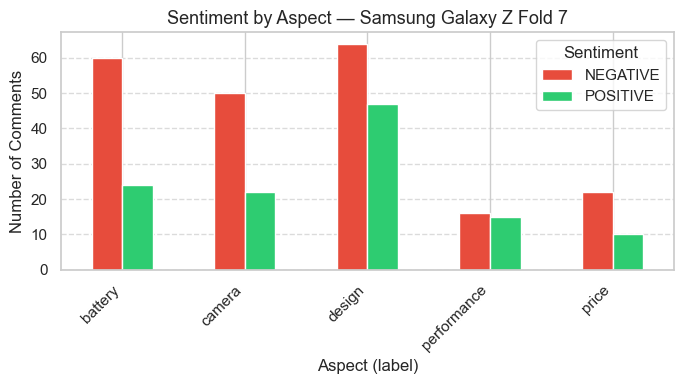

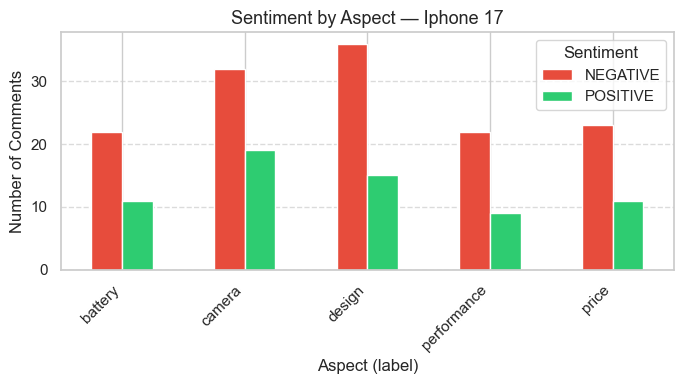

In [ ]:

sns.set(style="whitegrid")

inputs = df["input"].unique()

for inp in inputs:
    subset = df[df["input"] == inp]

    sentiment_counts = (
        subset.groupby(["label", "sentiment_label"])
        .size()
        .unstack(fill_value=0)
        .reset_index()
    )

    plt.figure(figsize=(7, 4))
    sentiment_counts.plot(
        x="label",
        kind="bar",
        stacked=False,
        color=["#E74C3C", "#2ECC71"], 
        ax=plt.gca()
    )

    plt.title(f"Sentiment by Aspect — {inp}", fontsize=13)
    plt.xlabel("Aspect (label)")
    plt.ylabel("Number of Comments")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()
